# Pronostico 1985- 2019 Lana

## Intentamos predecir la cantidad de kilos de lana que va a sacar

Importamos las librerias necesarias

In [66]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

Cargamos datos de produccion y del clima de los ulltimos 35 años

In [13]:
data = pd.read_csv('datos_produccion_clima_35.csv')
data

,fecha,esquila,ovejas,corderos,kilos_lana,rinde_seco,finura,kilo_lana_p/animal,porcentaje_paricion,temp_media,temp_min,tem_max,humedad,cant_lluvia,rad_solar,vel_viento
0,31/12/1985,3514,1419,912,15600,0.00,0.00,4.44,64.27,14.3,6.4,20.9,0.0,208.6,0.0,6.1
1,31/12/1986,3783,1520,680,18167,0.00,0.00,4.80,44.74,12.9,5.8,20.5,58.1,130.3,0.0,6.8
2,31/12/1987,3988,1928,512,11200,0.00,0.00,2.81,26.56,13.8,6.8,20.7,60.3,199.5,0.0,6.4
3,31/12/1988,3590,1560,310,13197,0.00,0.00,3.68,19.87,12.9,5.5,20.4,54.9,85.5,0.0,6.3
4,31/12/1989,2830,1210,150,12300,0.00,0.00,4.35,12.40,14.5,7.1,21.9,56.5,92.5,0.0,6.3
5,31/12/1990,2396,998,124,13900,0.00,0.00,5.80,12.42,14.2,6.8,21.7,56.2,96.0,0.0,7.4
6,31/12/1991,2503,1122,60,15800,0.00,0.00,6.31,5.35,13.2,5.8,20.6,60.3,240.0,0.0,6.3
7,31/12/1992,2790,1125,70,11600,0.00,0.00,4.16,6.22,14.4,4.7,19.9,62.2,335.2,0.0,6.4
8,31/12/1993,2765,1240,65,10306,0.00,0.00,3.73,5.24,14.8,5.5,21.0,58.1,155.7,0.0,5.9
9,31/12/1994,2641,925,34,9000,0.00,0.00,3.41,3.68,13.5,4.6,24.3,53.7,82.5,0.0,15.5


Nos quedamos con las columnas que nos interesan

In [14]:
data_intermedia = data[['fecha','kilos_lana']]
data_intermedia

,fecha,kilos_lana
0,31/12/1985,15600
1,31/12/1986,18167
2,31/12/1987,11200
3,31/12/1988,13197
4,31/12/1989,12300
5,31/12/1990,13900
6,31/12/1991,15800
7,31/12/1992,11600
8,31/12/1993,10306
9,31/12/1994,9000


Convertimos la columna fecha en datetime

In [15]:
data_intermedia['fecha'] = pd.to_datetime(data_intermedia['fecha'])
data_temp = data_intermedia
data_intermedia

/tmp/ipykernel_23158/2026727361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_intermedia['fecha'] = pd.to_datetime(data_intermedia['fecha'])


,fecha,kilos_lana
0,1985-12-31,15600
1,1986-12-31,18167
2,1987-12-31,11200
3,1988-12-31,13197
4,1989-12-31,12300
5,1990-12-31,13900
6,1991-12-31,15800
7,1992-12-31,11600
8,1993-12-31,10306
9,1994-12-31,9000


Convertimos la columna fcha en el indice del df

In [16]:
data_temp.set_index('fecha',inplace=True)
data_temp.index.name = None
data_temp

,kilos_lana
1985-12-31,15600
1986-12-31,18167
1987-12-31,11200
1988-12-31,13197
1989-12-31,12300
1990-12-31,13900
1991-12-31,15800
1992-12-31,11600
1993-12-31,10306
1994-12-31,9000


Visualizamos los datos

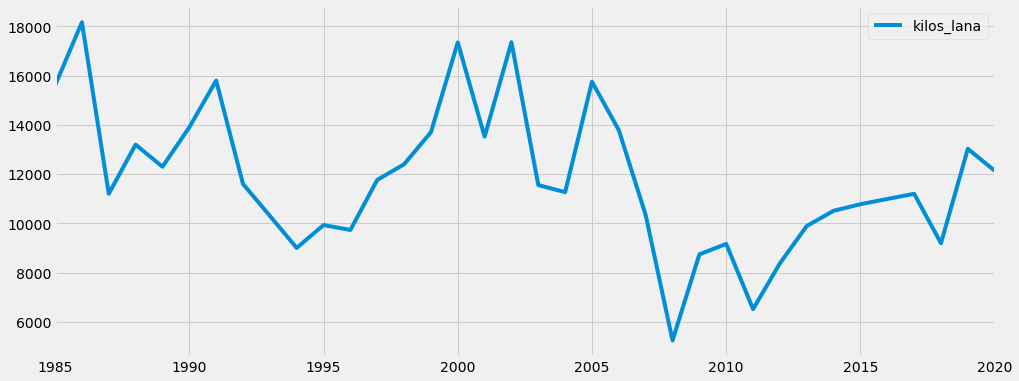

In [18]:
data_temp.plot(figsize=(15, 6))
plt.show()

Cuando buscamos ajustar datos de series de tiempo con un modelo ARIMA estacional, nuestro primer objetivo es encontrar los valores ARIMA(p,d,q)(P,D,Q)s que optimizan una métrica de interés. 

Asi que buscamos y seleccionamos los parámetros para el modelo de serie temporal ARIMA

In [19]:
# Define the p, d and q parameters to take any value between 0 and 2
# Defina los parámetros p, d y q para tomar cualquier valor entre 0 y 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
# Genere todas las diferentes combinaciones de tripletes p, d y q
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Genere todas las combinaciones diferentes de tripletes p, d y q estacionales
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('Ejemplos de combinaciones de parámetros para ARIMA estacional...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
Ejemplos de combinaciones de parámetros para ARIMA estacional...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
results_aic = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_temp,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            results_aic.append(results.aic)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05154D+01    |proj g|=  1.47367D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.474D-06   1.052D+01
  F =   10.515384902953631     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:759.1077130126614
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:474.2155238526281
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31593D+00    |proj g|=  9.01171D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      3      7      1     0     0   6.912D-06   6.284D+00
  F =   6.2841763598742642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:454.46069791094703
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.29336D+00    |proj g|=  1.81540D-03

At iterate   15    f=  6.29320D+00    |proj g|=  3.83095D-02

At iterate   20    f=  6.27601D+00    |proj g|=  3.66031D-01

At iterate   25    f=  6.20212D+00    |proj g|=  5.19843D-02

At iterate   30    f=  6.20121D+00    |proj g|=  1.86930D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     33      1     0     0   1.869D-05   6.201D+00
  F =   6.2012085593344848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:452.4870162720829
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:427.92544442414123
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.71794D+00    |proj g|=  2.48282D-01

At iterate    5    f=  2.61290D+00    |proj g|=  2.50029D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     10      1     0     0   3.685D-05   2.613D+00
  F =   2.6129027326102818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:194.1289967479403
RUNNING THE L-BFGS-B 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     36      1     0     0   2.366D-06   6.372D+00
  F =   6.3722685012188167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:464.8033320877548
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40712D+00    |proj g|=  2.42768D-01

At iterate    5    f=  6.30706D+00    |proj g|=  2.01273D-02

At iterate   10    f=  6.30526D+00    |proj g|=  4.81798D-05

At iterate   1

 This problem is unconstrained.



At iterate   35    f=  5.84811D+00    |proj g|=  6.39274D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     51      1     0     0   1.792D-06   5.848D+00
  F =   5.8480752321717269     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:429.06141671636436
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15081D+00    |proj g|=  5.72698D-02

At iterate    5    f=  3.14502D+00    |proj g|=  4.05312D-05

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.57635D+00    |proj g|=  6.34941D-03

At iterate   10    f=  2.57615D+00    |proj g|=  5.56883D-05

At iterate   15    f=  2.57615D+00    |proj g|=  7.08030D-04

At iterate   20    f=  2.57597D+00    |proj g|=  7.69109D-03

At iterate   25    f=  2.56953D+00    |proj g|=  5.81546D-02

At iterate   30    f=  2.49904D+00    |proj g|=  6.80877D-02

At iterate   35    f=  2.48431D+00    |proj g|=  6.10991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     51      1     0     0   1.771D-05   2.484D+00
  F =   2.4842914398645859     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:183.26371009480286
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98671D+00    |proj g|=  4.00382D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   4.004D-06   5.987D+00
  F =   5.9867055906611819     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:435.0428025276051
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  2.59439D+00    |proj g|=  2.57103D-03

At iterate   20    f=  2.59257D+00    |proj g|=  2.96098D-02

At iterate   25    f=  2.50059D+00    |proj g|=  2.76405D-01

At iterate   30    f=  2.44498D+00    |proj g|=  8.56495D-03

At iterate   35    f=  2.44468D+00    |proj g|=  6.79456D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     41      1     0     0   6.795D-09   2.445D+00
  F =   2.4446826062591023     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:182.01714765065537
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:397.4656275922028
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68020D+00    |proj g|=  6.61140D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   7.776D-06   5.680D+00
  F =   5.6800713109255518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.96513438663976
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.80671D+00    |proj g|=  2.09155D-01

At iterate   25    f=  2.77134D+00    |proj g|=  7.15312D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     33      1     0     0   4.521D-06   2.771D+00
  F =   2.7713428213373894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:205.53668313629203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44724D+00    |proj g|=  2.31695D-01

At iterate   

 This problem is unconstrained.



At iterate   25    f=  2.28316D+00    |proj g|=  1.28628D-01

At iterate   30    f=  2.21262D+00    |proj g|=  4.11906D-02

At iterate   35    f=  2.20886D+00    |proj g|=  1.17152D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     42      1     0     0   2.211D-07   2.209D+00
  F =   2.2088584869672463     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:167.03781106164175
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:448.81338777758907
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96395D+00    |proj g|=  2.60132D-01

At iterate    5    f=  2.85111D+00    |proj g|=  7.92620D-05

At iterate   10    f=  2.85111D+00    |proj g|=  5.22925D-04

At iterate   15    f=  2.85102D+00    |proj g|=  6.95563D-03

At iterate   20    f=  2.84080D+00    |proj g|=  4.36155D-02

At iterate   25    f=  2.75323D+00    |proj g|=  6.32420D-02

At iterate   30    f=  2.74911D+00    |proj g|=  7.74429D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.98313D+00    |proj g|=  9.68945D-02

At iterate    5    f=  5.98257D+00    |proj g|=  3.26894D-04

At iterate   10    f=  5.98234D+00    |proj g|=  3.80792D-01

At iterate   15    f=  5.96792D+00    |proj g|=  6.20806D-01

At iterate   20    f=  5.95073D+00    |proj g|=  3.57873D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     34      1     0     0   3.069D-05   5.951D+00
  F =   5.9507301184569874     

CONVERG

 This problem is unconstrained.



At iterate   25    f=  2.82059D+00    |proj g|=  7.68284D-02

At iterate   30    f=  2.72385D+00    |proj g|=  4.90697D-02

At iterate   35    f=  2.71858D+00    |proj g|=  2.16891D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     40      1     0     0   6.053D-06   2.719D+00
  F =   2.7185701783002103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:203.73705283761515
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:417.0531667211295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.88453D+00    |proj g|=  2.16559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      7      1     0     0   9.455D-06   5.883D+00
  F =   5.8828255277873103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:429.56343800068635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.67343D+00    |proj g|=  8.05655D-02

At iterate   15    f=  5.67248D+00    |proj g|=  1.92529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     22      1     0     0   1.925D-05   5.672D+00
  F =   5.6724768246576964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:418.4183313753541
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85088D+00    |proj g|=  8.77377D-02

At iterate    

 This problem is unconstrained.



At iterate   25    f=  2.81650D+00    |proj g|=  9.98425D-02

At iterate   30    f=  2.74198D+00    |proj g|=  4.55800D-02

At iterate   35    f=  2.73692D+00    |proj g|=  2.51010D-02

At iterate   40    f=  2.73643D+00    |proj g|=  1.39058D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     59      1     0     0   1.391D-06   2.736D+00
  F =   2.7364277490864746     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:205.02279793422616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X

 This problem is unconstrained.



At iterate   10    f=  2.57069D+00    |proj g|=  4.95329D-02

At iterate   15    f=  2.56747D+00    |proj g|=  7.65094D-04

At iterate   20    f=  2.56747D+00    |proj g|=  2.35604D-04

At iterate   25    f=  2.56744D+00    |proj g|=  3.69076D-03

At iterate   30    f=  2.56398D+00    |proj g|=  2.95036D-02

At iterate   35    f=  2.53261D+00    |proj g|=  7.27292D-02

At iterate   40    f=  2.46989D+00    |proj g|=  4.41660D-02

At iterate   45    f=  2.46495D+00    |proj g|=  9.19678D-03

At iterate   50    f=  2.46490D+00    |proj g|=  3.69274D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:636.6794202049878
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70706D+00    |proj g|=  1.33848D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   8.118D-06   5.696D+00
  F =   5.6959503860953191     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:416.108427798863
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =      

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.61521D+00    |proj g|=  1.25413D-04

At iterate   10    f=  2.61513D+00    |proj g|=  3.07015D-03

At iterate   15    f=  2.60905D+00    |proj g|=  6.43497D-02

At iterate   20    f=  2.51830D+00    |proj g|=  5.57312D-02

At iterate   25    f=  2.51700D+00    |proj g|=  4.94810D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     30      1     0     0   5.794D-06   2.517D+00
  F =   2.5170010923885680     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:187.2240786519769
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   15    f=  2.60346D+00    |proj g|=  1.63914D-03

At iterate   20    f=  2.60238D+00    |proj g|=  2.01791D-02

At iterate   25    f=  2.51244D+00    |proj g|=  2.69418D-01

At iterate   30    f=  2.44250D+00    |proj g|=  8.81646D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     37      1     0     0   2.316D-06   2.442D+00
  F =   2.4423603047866682     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:183.8499419446401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.44395D+00    |proj g|=  7.93599D-02

At iterate    5    f=  5.43722D+00    |proj g|=  4.05590D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   3.512D-05   5.437D+00
  F =   5.4371942538527662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:399.47798627739917
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     13      1     0     0   4.432D-05   5.658D+00
  F =   5.6577495655292580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:413.3579687181066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44403D+00    |proj g|=  2.23296D-01

At iterate    5    f=  2.34382D+00    |proj g|=  4.57470D-03

At iterate   10    f=  2.34295D+00    |proj g|=  4.64237D-05

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.43679D+00    |proj g|=  4.38575D-02

At iterate   10    f=  5.43253D+00    |proj g|=  5.94800D-03

At iterate   15    f=  5.42130D+00    |proj g|=  8.34025D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     30      1     0     0   1.652D-05   5.421D+00
  F =   5.4211946943154112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:400.3260179907096
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  2.59917D+00    |proj g|=  5.34185D-05

At iterate   15    f=  2.59917D+00    |proj g|=  1.48592D-03

At iterate   20    f=  2.59900D+00    |proj g|=  1.89449D-02

At iterate   25    f=  2.57644D+00    |proj g|=  1.38015D-01

At iterate   30    f=  2.49811D+00    |proj g|=  6.77325D-02

At iterate   35    f=  2.48359D+00    |proj g|=  1.88736D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     64      1     0     0   1.234D-05   2.484D+00
  F =   2.4835859167011636     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:186.81818600248377
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44403D+00    |proj g|=  2.23296D-01

At iterate    5    f=  2.33631D+00    |proj g|=  6.45306D-04

At iterate   10    f=  2.33617D+00    |proj g|=  2.74903D-03

At iterate   

In [21]:
min(results_aic)
# ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:167.03781106166736

167.03781106164175

Creamos el modelo y lo entrenamos

In [71]:
mod = sm.tsa.statespace.SARIMAX(data_temp,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)

results = mod.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25228D+00    |proj g|=  4.37869D-01

At iterate    5    f=  6.09538D+00    |proj g|=  2.58807D-03

At iterate   10    f=  6.09534D+00    |proj g|=  2.14580D-04

At iterate   15    f=  6.09530D+00    |proj g|=  4.09186D-03

At iterate   20    f=  6.09040D+00    |proj g|=  4.86950D-02

At iterate   25    f=  6.00491D+00    |proj g|=  1.78045D-02

At iterate   30    f=  6.00328D+00    |proj g|=  1.90002D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

Miramos comportamiento del modelo

In [72]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0746      0.215      0.347      0.729      -0.347       0.497
ar.S.L12      -0.2689      0.227     -1.186      0.236      -0.714       0.176
ma.S.L12      -1.0000      0.383     -2.614      0.009      -1.750      -0.250
sigma2       5.52e+06   6.93e-08   7.97e+13      0.000    5.52e+06    5.52e+06


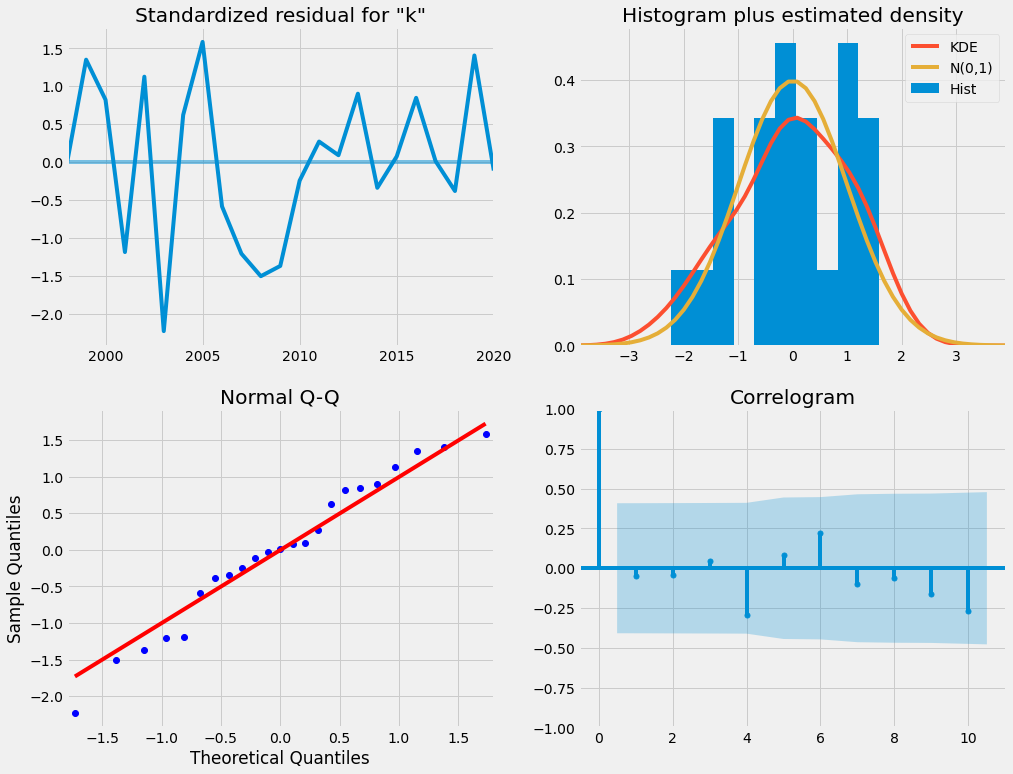

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

En este caso, el diagnóstico de nuestro modelo sugiere lo siguiente:

- En el gráfico superior derecho, vemos que la línea roja KDE sigue masomenos de cerca a la línea N(0,1)(donde N(0,1) es la notación estándar para una distribución normal con media 0 y desviación estándar de 1). Ésta es una  indicación de que los residuos se distribuyen bastante normalmente.
- El gráfico qq en la parte inferior izquierda muestra que la distribución ordenada de los residuos (puntos azules) sigue masomenos la tendencia lineal de las muestras tomadas de una distribución normal estándar con N(0,1). Nuevamente, esta es una fuerte indicación de que los residuos se distribuyen normalmente.
- Los residuos a lo largo del tiempo (gráfico superior izquierdo) y eñ gráfico de autocorrelación (es decir, correlograma) en la parte inferior derecha, no son buenos.

Esas observaciones nos llevan a concluir que nuestro modelo produce un ajuste poco satisfactorio.

Hacemos predicciones

In [35]:
pred = results.get_prediction(start=pd.to_datetime('2019-12-31'), dynamic=False)
pred_ci = pred.conf_int()
pred_ci

,lower kilos_lana,upper kilos_lana
2019-12-31,3628.063618,14575.561076
2020-12-31,6971.148862,17916.569270


In [36]:
algo = pred.summary_frame(alpha=0.05)
algo

kilos_lana,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-12-31,9101.812347,2792.780261,3628.063618,14575.561076
2020-12-31,12443.859066,2792.250392,6971.148862,17916.569270


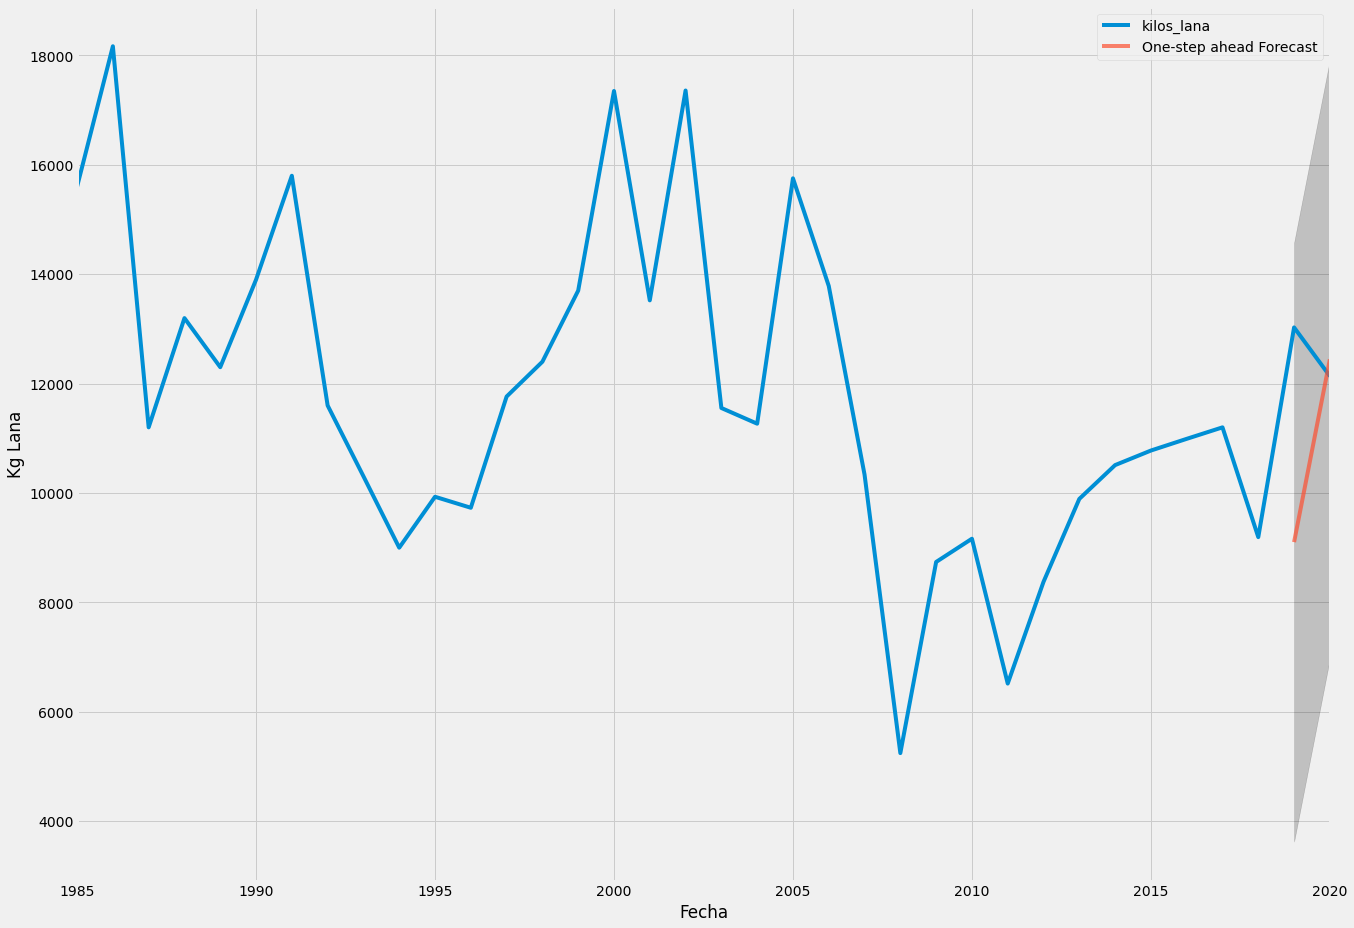

In [37]:
ax = data_temp['1985':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Kg Lana')
plt.legend()

plt.show()

PREDICE HORRIBLEMENTE

In [67]:
y_forecasted = pred.predicted_mean
y_truth = data_temp['2019-12-31':]
# Compute the mean square error
# Calcule el error cuadrático medio
mse = mean_squared_error(y_truth, y_forecasted)
#mse
print('El error cuadrático medio de nuestros pronósticos es {}'.format(round(mse, 2)))

El error cuadrático medio de nuestros pronósticos es 7750937.66


Hago otra prediccion pero dos años adelante

In [33]:
pred_1 = results.get_prediction(start=pd.to_datetime('2016-12-31'), end=pd.to_datetime('2022-12-31') , dynamic=False)
pred_ci_1 = pred_1.conf_int()
pred_ci_1

,lower kilos_lana,upper kilos_lana
2016-12-31,3149.825857,14097.323315
2017-12-31,5688.028228,16635.525686
2018-12-31,4781.887095,15729.384554
2019-12-31,3628.063618,14575.561076
2020-12-31,6971.148862,17916.569270
2021-12-31,12807.501629,23363.630794
2022-12-31,11535.316313,26958.305163


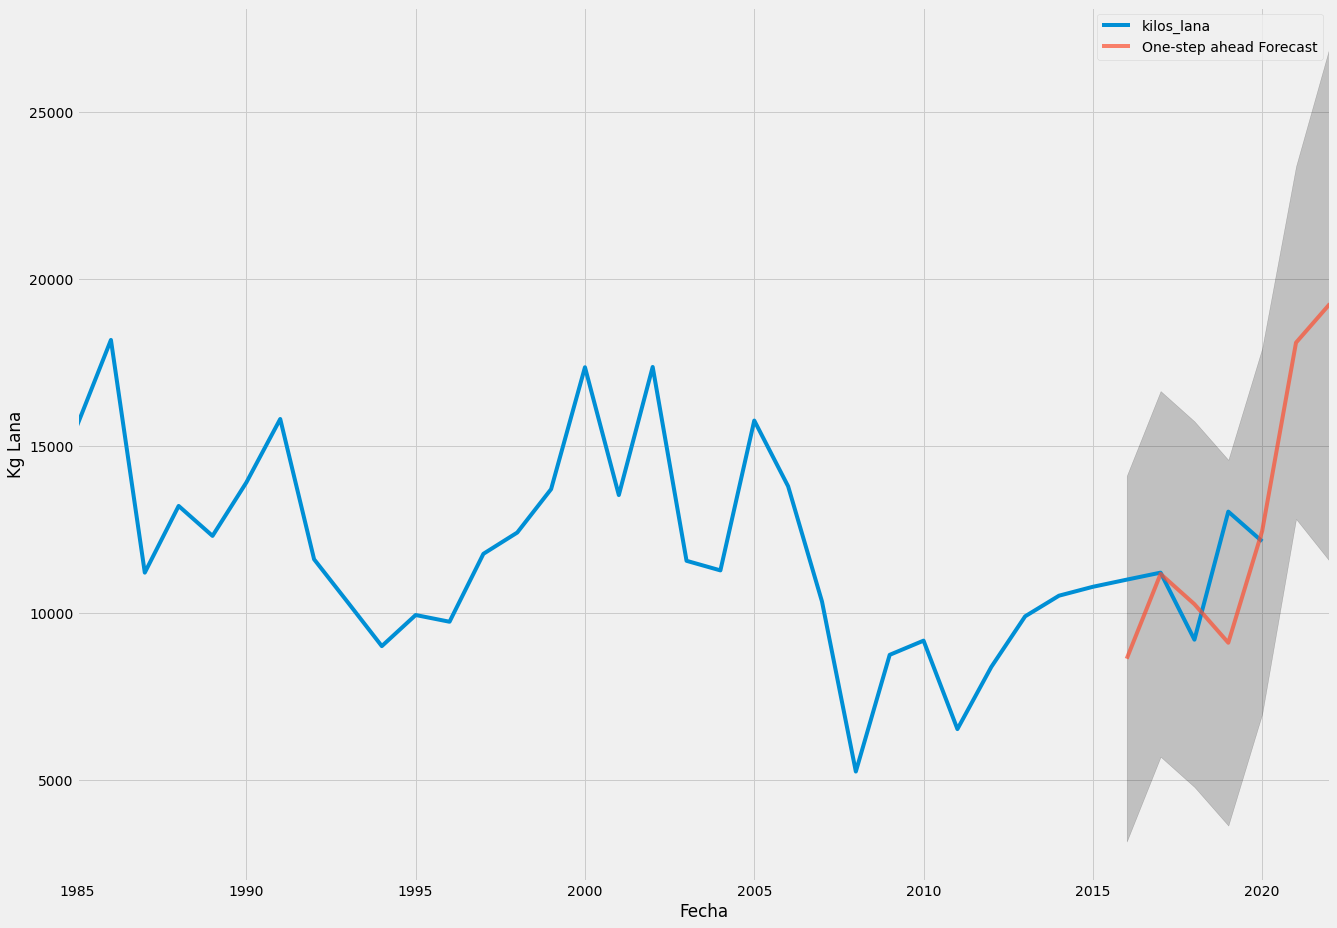

In [60]:
ax = data_temp['1985':].plot(label='observed', figsize=(20, 15))
pred_1.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci_1.index,
                pred_ci_1.iloc[:, 0],
                pred_ci_1.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Fecha')
ax.set_ylabel('Kg Lana')
plt.legend()

plt.show()

PREDICE FEO

Esta es otra forma de predecir

In [40]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-12-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci

,lower kilos_lana,upper kilos_lana
2019-12-31,3628.063618,14575.561076
2020-12-31,200.495028,16260.034122


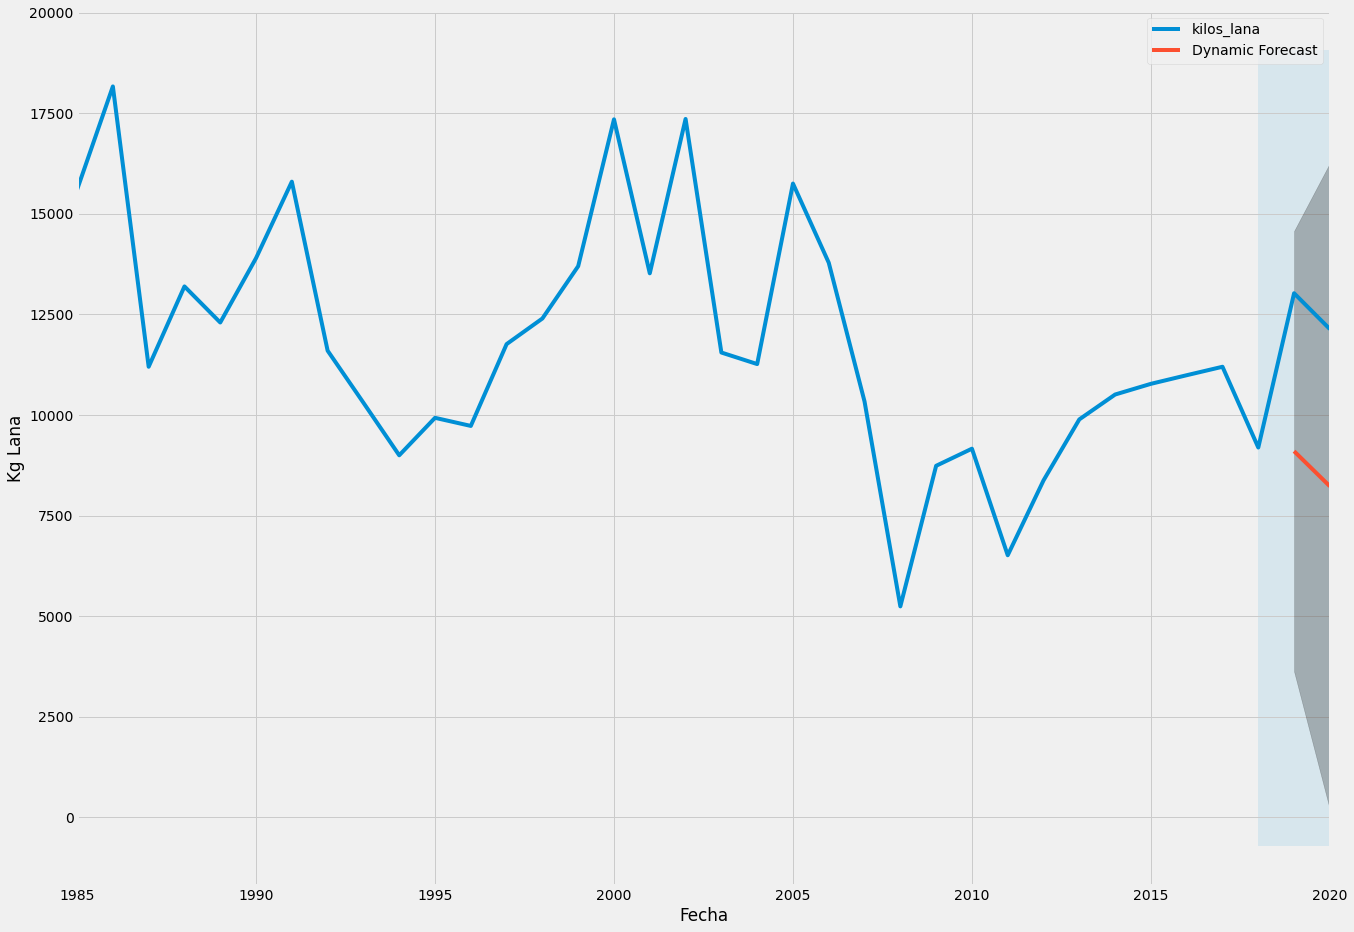

In [62]:
ax = data_temp['1985':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2018-01-01'), data_temp.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Fecha')
ax.set_ylabel('Kg Lana')

plt.legend()
plt.show()

In [70]:
# Extract the predicted and true values of our time series
# Extraiga los valores predichos y verdaderos de nuestra serie de tiempo
y_forecasted = pred_dynamic.predicted_mean
y_truth = data_temp['2019-01-01':]

# Compute the mean square error
# Calcule el error cuadrático medio
mse = mean_squared_error(y_truth, y_forecasted)
print('El error cuadrático medio de nuestros pronósticos es {}'.format(round(mse, 2)))

El error cuadrático medio de nuestros pronósticos es 15330933.66


Predice mal!

Predecimos 10 años en el futuro

In [64]:
# Get forecast 500 steps ahead in future
# Obtenga una previsión de 10 pasos adelante en el futuro
pred_uc = results.get_forecast(steps=10)

# Get confidence intervals of forecasts
# Obtenga intervalos de confianza de los pronósticos
pred_ci = pred_uc.conf_int()

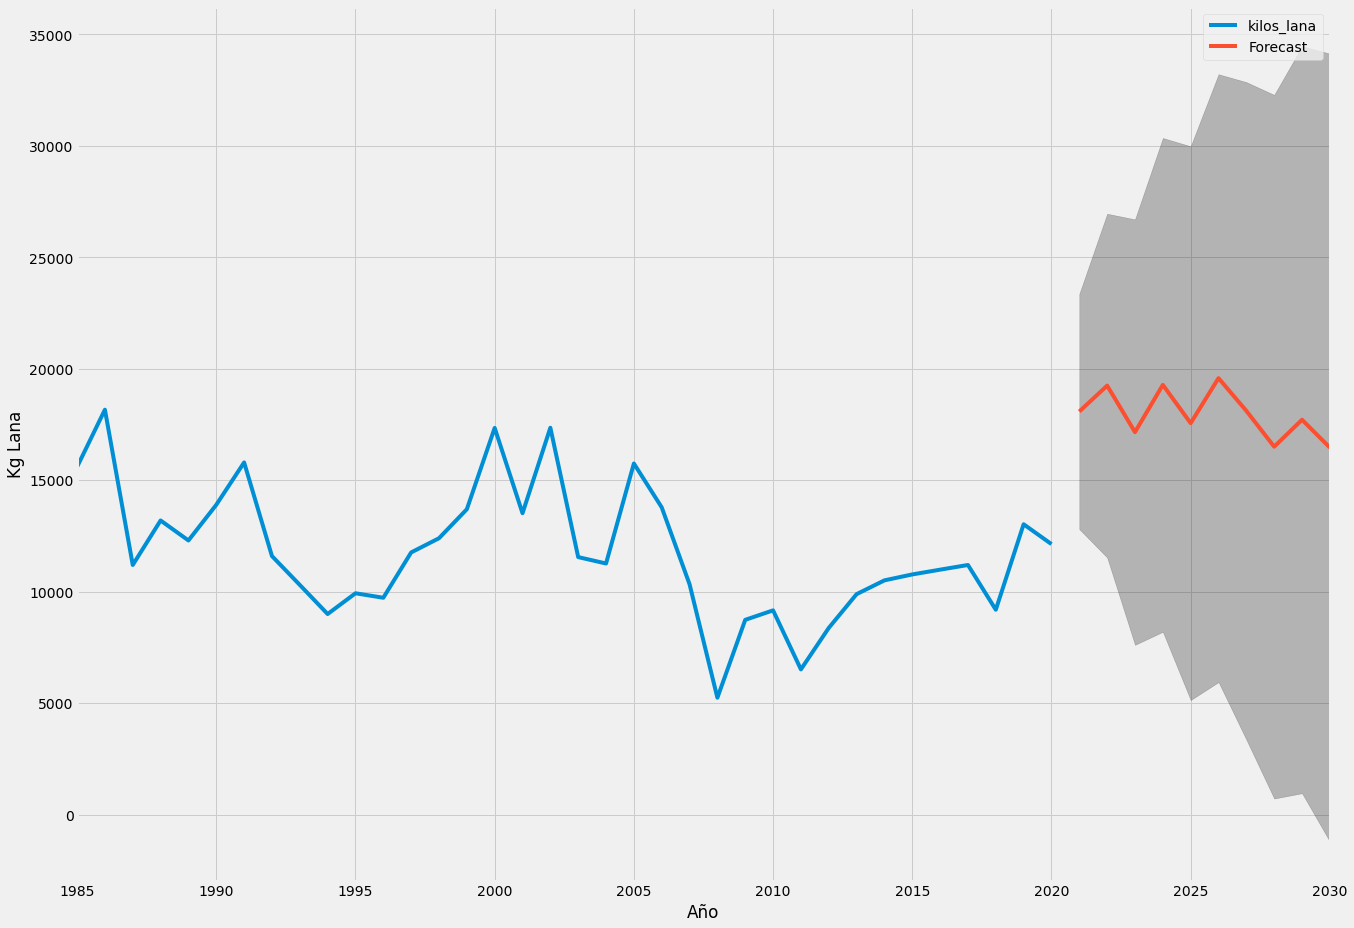

In [65]:
ax = data_temp.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Año')
ax.set_ylabel('Kg Lana')

plt.legend()
plt.show()